In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('house_price_dataset_original_v2_cleaned.csv')

In [17]:
data.dropna()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,1,1,1,1,2.9,1,20,0,4.1,3.99,2,235882
4950,302,282,4,2,1,1,1,1,3.8,1,12,1,4.8,2.09,2,290995
4951,153,147,3,4,1,1,0,0,3.3,1,7,0,4.7,3.98,3,106428
4952,180,158,2,1,0,1,0,1,2.2,0,1,0,3.4,3.75,2,107579


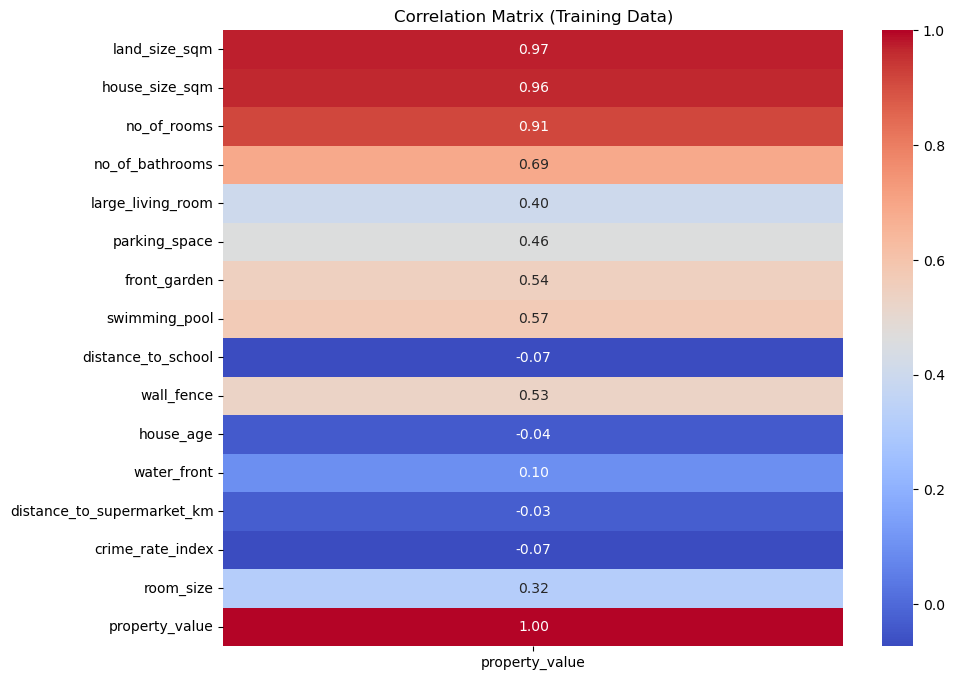

In [32]:
import seaborn as sns


target_column = 'property_value'

# Perform correlation analysis
correlation_matrix = data.corr()[[target_column]]


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Training Data)')
plt.show()

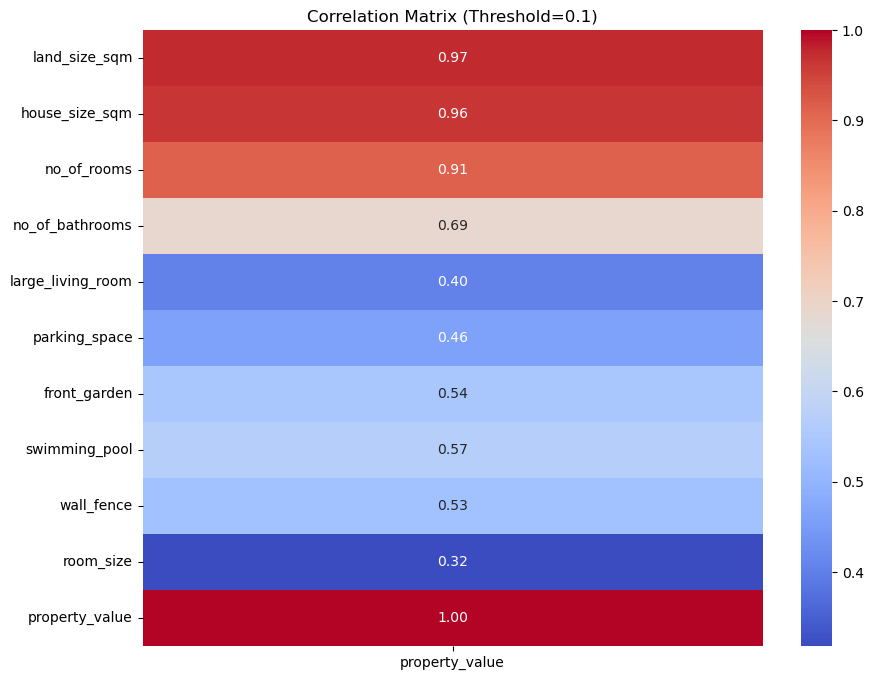

Selected columns after filtering: ['land_size_sqm', 'house_size_sqm', 'no_of_rooms', 'no_of_bathrooms', 'large_living_room', 'parking_space', 'front_garden', 'swimming_pool', 'wall_fence', 'room_size', 'property_value']


In [33]:
threshold = 0.1

# Filter out columns with correlations less than the threshold
correlation_filtered = correlation_matrix[(correlation_matrix[target_column] >= threshold) | (correlation_matrix[target_column] <= -threshold)]

# Plot heatmap for filtered correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix (Threshold={threshold})')
plt.show()

# List of columns retained after filtering
selected_columns = correlation_filtered.index.tolist()
print("Selected columns after filtering:", selected_columns)

In [35]:
# Define your correlation threshold
threshold = 0.1

# Get columns with correlation greater than or equal to the threshold
selected_columns = correlation_matrix[(correlation_matrix[target_column] >= threshold) | (correlation_matrix[target_column] <= -threshold)].index

# Filter the overall dataset based on selected columns
filtered_data = data[selected_columns]

# Define the file path for the filtered dataset
output_file = 'filtered_data.csv'

# Save the filtered dataset to a CSV file
filtered_data.to_csv(output_file, index=False)

print(f"Filtered data saved to {output_file}")

Filtered data saved to filtered_data.csv
